# Loads

In [6]:
import numpy as np
from xgboost import XGBClassifier
from PBP.datasources import ChunkDS
from PBP.models import LogRegModel, SKlearnWrapper, BalanceOptimization
from PBP.objfuncs import Accuracy, Fscore
from sklearn.svm import SVC
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds_train = ChunkDS(samples=5e5)
ds_test = ChunkDS(skip=int(5e5), samples=2e5)

fscore = Fscore()

## LogReg

In [3]:
logisticModel = LogRegModel(C = 1.)
balanceOptim = BalanceOptimization(logisticModel, fscore, tqdm = True, grid_size=10)
balanceOptim.fit(ds_train)

HBox(children=(IntProgress(value=0, max=11), HTML(value='')))

/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


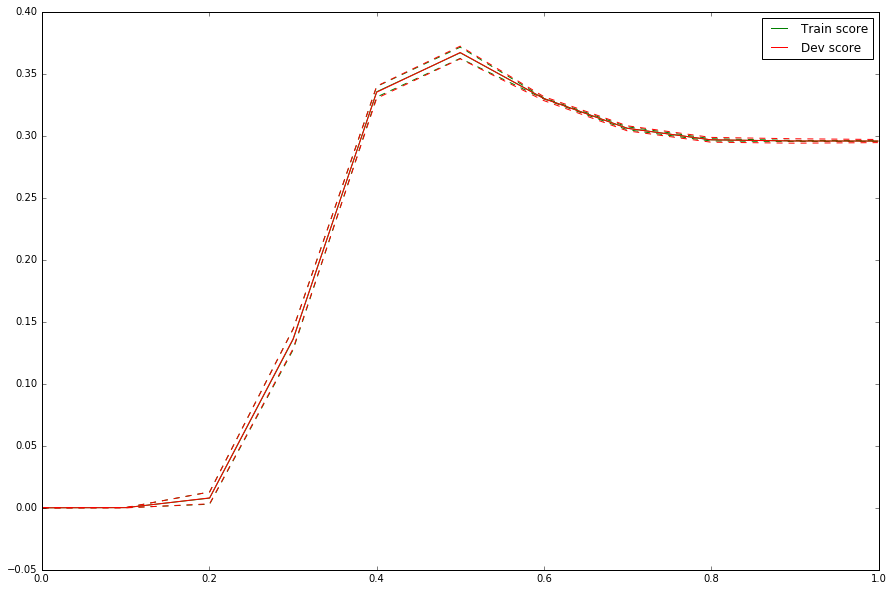

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
balanceOptim.plot_score_curves()

## XGBoost

In [7]:
xgbregressor = SKlearnWrapper(XGBClassifier(colsample_bytree=.5, subsample=.95, max_depth=3, n_estimators=30))
balanceOptim = BalanceOptimization(xgbregressor, fscore, tqdm = True, grid_size=10)
balanceOptim.fit(ds_train)

HBox(children=(IntProgress(value=0, max=11), HTML(value='')))

/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid 

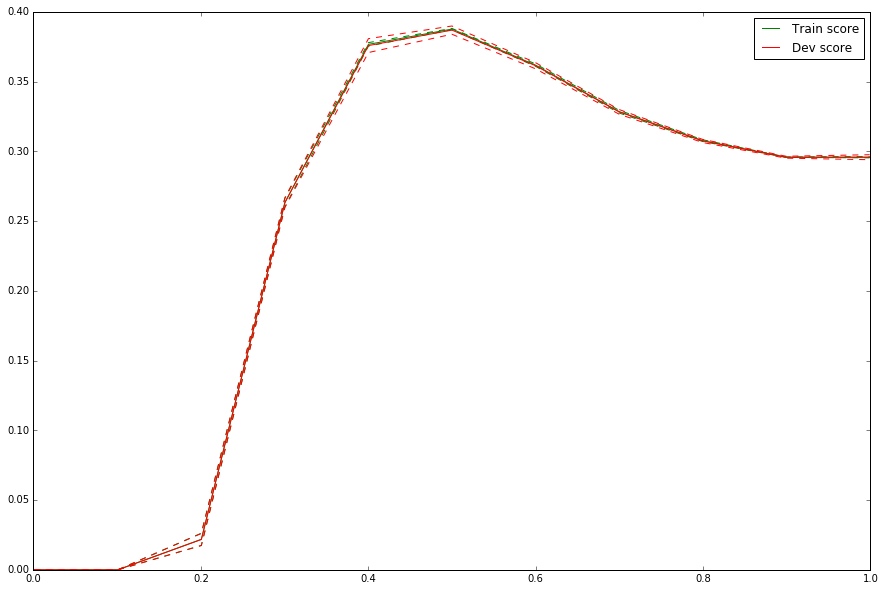

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
balanceOptim.plot_score_curves()

## KernelSVM

In [ ]:
kernelSVC = SKlearnWrapper(SVC(kernel = 'poly', degree=2))
balanceOptim = BalanceOptimization(kernelSVC, fscore, tqdm = True, grid_size=10)
balanceOptim.fit(ds_train)

HBox(children=(IntProgress(value=0, max=11), HTML(value='')))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
balanceOptim.plot_score_curves()